In [80]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

### ***Prepare Dataset of Envi Apple***

อ่านไฟล์ csv ของชุดข้อมูลตัวอย่างของ Envi

In [81]:
df_envi_inter = pd.read_csv("../../../DataSet/Envi/envi.csv")

In [82]:
df_envi_inter

,Date,Envi
0,04/01/2015,44562
1,11/01/2015,38112
2,18/01/2015,50355
3,25/01/2015,51922
4,01/02/2015,67496
...,...,...
164,25/02/2018,42116
165,04/03/2018,44454
166,11/03/2018,28399
167,18/03/2018,49145


In [83]:
df_envi_inter["Date"] = pd.to_datetime(df_envi_inter["Date"], unit="ns")

ทำนายวันถ้ดไปโดยใส่ค่าปริมาณของแอปเปิ้ลวันก่อนหน้า

In [84]:
df_envi_inter["y"] = df_envi_inter["Envi"].shift(-1)
df_envi_inter.dropna(inplace=True)
df_envi_inter

,Date,Envi,y
0,2015-04-01,44562,38112.0
1,2015-11-01,38112,50355.0
2,2015-01-18,50355,51922.0
3,2015-01-25,51922,67496.0
4,2015-01-02,67496,54229.0
...,...,...,...
163,2018-02-18,39773,42116.0
164,2018-02-25,42116,44454.0
165,2018-04-03,44454,28399.0
166,2018-11-03,28399,49145.0


In [85]:
# plt.scatter(df_envi_inter["Envi"], df_envi_inter["y"])
# plt.show()

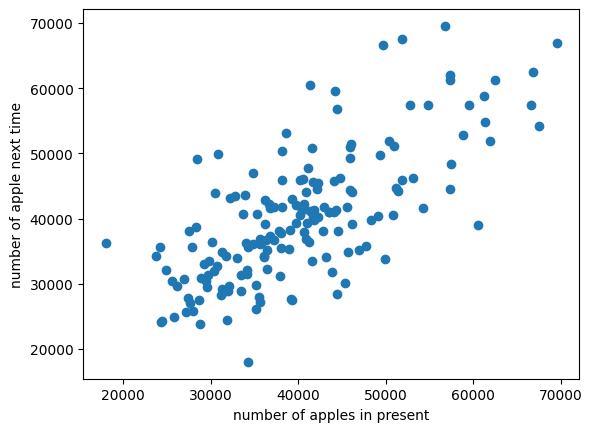

In [86]:
x = np.array(df_envi_inter["Envi"])
y = np.array(df_envi_inter["y"])

# scaler = StandardScaler()
# scaler.fit(x.reshape(-1, 1))
# x = scaler.transform(x.reshape(-1, 1))
# scaler.fit(y.reshape(-1, 1))
# y = scaler.transform(y.reshape(-1, 1))
plt.scatter(x, y)

plt.xlabel("number of apples in present")
plt.ylabel("number of apple next time")
plt.show()

### ***Train Model Of Envi Apple***

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

Baseline Predict

In [88]:
baseline_predict = x_test

In [89]:
def findBestBaseLine(r,t,x,y):
    a = 1000000
    index = 0
    for i in range(r,t):
        x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=i)
        if (buffer := mean_absolute_error(y_test, x_test)) < a:
            a = buffer
            index = i
            # print(buffer)
    print(a, index)
    

# findBestBaseLine(100000,1000000,x,y)
# seed 6888 MAE: 3076.595238095238

### ***Predict from test_dataset Of Envi***

Mean Absolute Error: 6154.833333333333
Mean Square Error: 70823387.40476191
R2 score: 0.4542559718519178


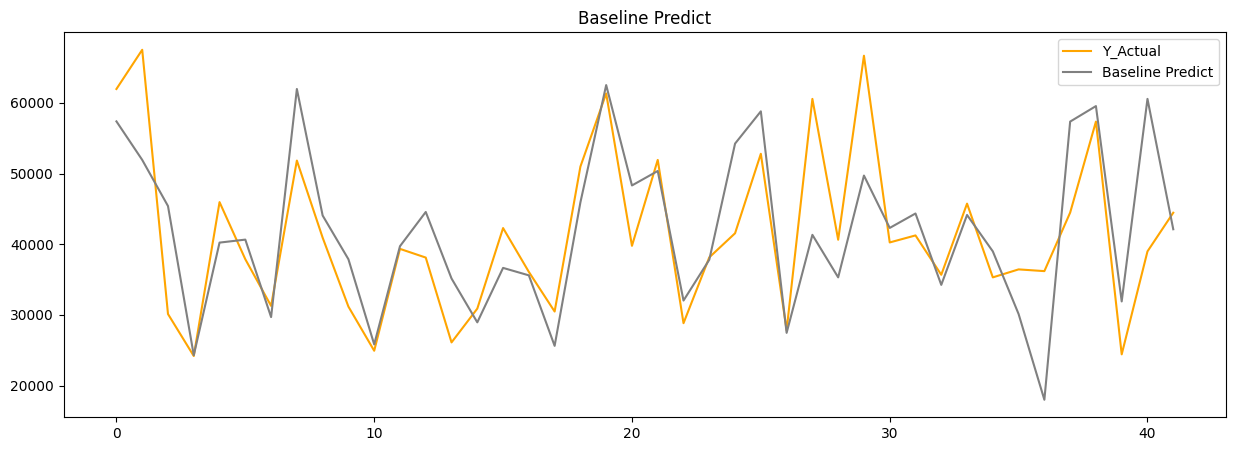

In [90]:
print(f"Mean Absolute Error: {mean_absolute_error(y_test, baseline_predict)}")
print(f"Mean Square Error: {mean_squared_error(y_test, baseline_predict)}")
print(f"R2 score: {r2_score(y_test, baseline_predict)}")

# plt.scatter(x,y)
plt.figure(figsize=(15,5))
plt.plot(y_test, label='Y_Actual', color='orange')
plt.plot(baseline_predict, label='Baseline Predict', color='gray')
plt.legend()

# plt.xlabel("Number of apples of present")
# plt.ylabel("Number of apples of predict next time")
plt.title("Baseline Predict")
plt.show()

---